# Iris Flower classification using decision tree

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [6]:
# load 
iris=load_iris()

In [8]:
# create dataframe
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['species']=iris.target #Add species column(target)

In [10]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [12]:
#split the dataset into features (x) and target(y)
x=df.drop('species',axis=1)

In [14]:
y=df['species']# target (species: 0=setosa,1=versicolor,2=virginica)

In [16]:
#split the dataset into training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
# train the decion classifier
classifier=DecisionTreeClassifier()

In [20]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred=classifier.predict(x_test)

In [28]:
#evaluate the model
accuracy=metrics.accuracy_score(y_test,y_pred)
conf_matrix=metrics.confusion_matrix(y_test,y_pred)
class_report=metrics.classification_report(y_test,y_pred) ## tell all precision,recall,f1score

In [30]:
print(accuracy)
print(conf_matrix)
print(class_report)

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



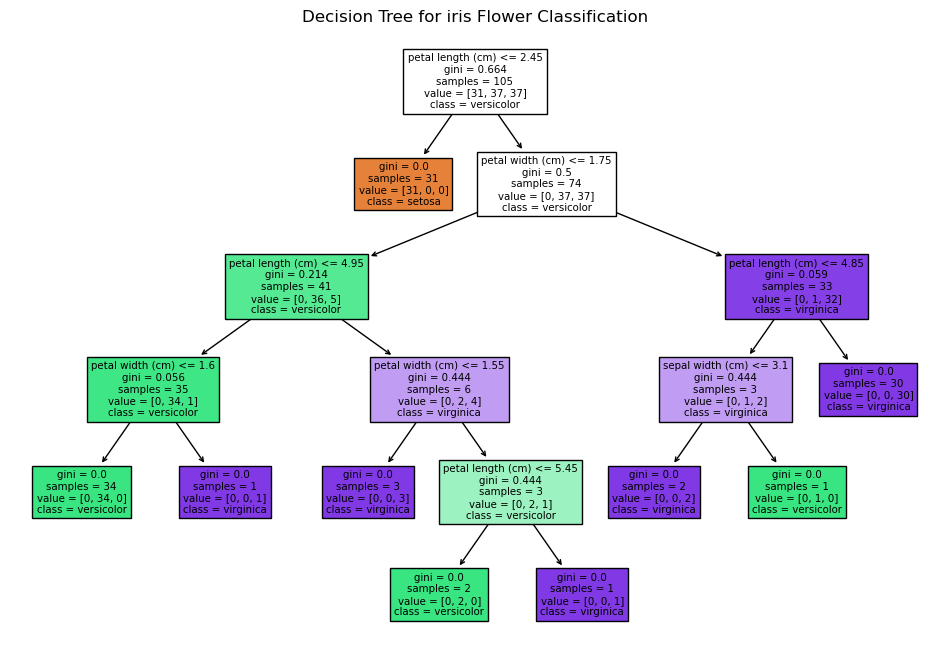

In [34]:
#visualize the decision Tree
plt.figure(figsize=(12,8))
plot_tree(classifier,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.title('Decision Tree for iris Flower Classification')
plt.show()